In [2]:
import librosa
import IPython.display as ipd
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_ds, test_ds = tfds.load('spoken_digit', split=['train[:75%]', 'train[:25%]'], shuffle_files=True, as_supervised=True)
train_ds_np = tfds.as_numpy(train_ds)
test_ds_np = tfds.as_numpy(test_ds)

x_train = [x.astype(np.float32) for x, y in train_ds_np]
y_train = [y.astype(np.float32) for x, y in train_ds_np]

x_test = [x.astype(np.float32) for x, y in test_ds_np]
y_test = [y.astype(np.float32) for x, y in test_ds_np]

print(f"{len(x_train)}, {len(x_test)}")
print(f"{len(y_train)}, {len(y_test)}")

Fs = 8000

2025-05-06 10:29:50.977117: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-06 10:29:50.984322: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746520190.992778   32420 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746520190.995283   32420 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746520191.001768   32420 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [00:05<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:05<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:05<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:05<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:05<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:05<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:06<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:06<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:06<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:06<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:06<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:06<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:06<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:06<00:00,  1.50s/ url]

Dl Completed...: 100%|██████████| 1/

Dataset spoken_digit downloaded and prepared to /home/hikari/tensorflow_datasets/spoken_digit/1.0.9. Subsequent calls will reuse this data.


2025-05-06 10:30:02.595562: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-05-06 10:30:02.720711: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-06 10:30:02.828603: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1875, 625
1875, 625


2025-05-06 10:30:02.935166: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [4]:
item_index = np.random.randint(0, len(y_train), size=1)[0]

# Signal
s = x_train[item_index]
display(s.shape)

ipd.Audio(s, rate=Fs)

(3240,)

In [5]:
hop_length = 128
n_fft = 2048

In [6]:
# Spectrogram
S = librosa.stft(s, n_fft=n_fft, hop_length=hop_length)
display(S.shape)

(1025, 26)

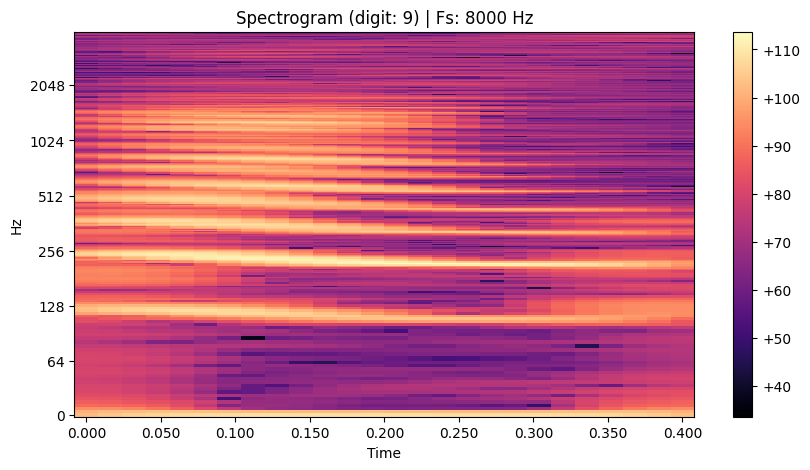

In [7]:
plt.figure(figsize=(10, 5))
plt.title(f'Spectrogram (digit: {int(y_train[item_index])}) | Fs: {Fs} Hz')
librosa.display.specshow(
    librosa.power_to_db(np.abs(S)**2), 
    sr=Fs, 
    hop_length=hop_length, 
    x_axis="time", 
    y_axis="log"
)
plt.colorbar(format="%+2.f")
